#Celeba Dataset

In [ ]:
!pip -qq install kaggle 
!gdown https://drive.google.com/uc?id=1YFE015mD3tgeCIXwoAVefsaPDK_jRMfk

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Downloading...
From: https://drive.google.com/uc?id=1YFE015mD3tgeCIXwoAVefsaPDK_jRMfk
To: /content/kaggle.json
100% 73.0/73.0 [00:00<00:00, 156kB/s]


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

100% 1.33G/1.33G [00:59<00:00, 24.5MB/s]
100% 1.33G/1.33G [00:59<00:00, 24.0MB/s]


In [ ]:
!unzip -qq celeba-dataset.zip

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd
import os
import os.path as osp
import random
import numpy as np

In [ ]:
dataset_fld = '/content/'
img_fld = osp.join(dataset_fld, 'img_align_celeba/img_align_celeba')
# extract labels
celeba_df = pd.read_csv(osp.join(dataset_fld, 'list_attr_celeba.csv'))
celeba_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
celeba_df.Eyeglasses.value_counts()

-1    189406
 1     13193
Name: Eyeglasses, dtype: int64

In [ ]:
celeba_df['filename'] =  img_fld + '/' + celeba_df['image_id']
celeba_df['has_glasses'] = celeba_df.Eyeglasses

celeba_df.loc[celeba_df.has_glasses == -1, 'has_glasses'] = 0
celeba_df['dataset'] = 'celeba'
celeba_df[['image_id', 'filename', 'has_glasses']].head()

,image_id,filename,has_glasses
0,000001.jpg,/content/img_align_celeba/img_align_celeba/000...,0
1,000002.jpg,/content/img_align_celeba/img_align_celeba/000...,0
2,000003.jpg,/content/img_align_celeba/img_align_celeba/000...,0
3,000004.jpg,/content/img_align_celeba/img_align_celeba/000...,0
4,000005.jpg,/content/img_align_celeba/img_align_celeba/000...,0


#MeGlass Dataset

In [ ]:
!gdown --id "1V0c8p6MOlSFY5R-Hu9LxYZYLXd8B8j9q&confirm=t"
!unzip -qq MeGlass_120x120.zip 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V0c8p6MOlSFY5R-Hu9LxYZYLXd8B8j9q&confirm=t
To: /content/MeGlass_120x120.zip
100% 352M/352M [00:09<00:00, 35.6MB/s]


In [ ]:
!wget https://github.com/cleardusk/MeGlass/raw/master/meta.txt

--2023-03-02 01:34:47--  https://github.com/cleardusk/MeGlass/raw/master/meta.txt
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cleardusk/MeGlass/master/meta.txt [following]
--2023-03-02 01:34:47--  https://raw.githubusercontent.com/cleardusk/MeGlass/master/meta.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2063395 (2.0M) [text/plain]
Saving to: ‘meta.txt’

meta.txt            100%[===================>]   1.97M  --.-KB/s    in 0.008s  

2023-03-02 01:34:47 (242 MB/s) - ‘meta.txt’ saved [2063395/2063395]



In [ ]:
'''
%ls /content/MeGlass_120x120

'99887786@N00_identity_0@3697214506_1.jpg'
'99887786@N00_identity_0@4979904117_0.jpg'
'99887786@N00_identity_0@5283092795_0.jpg'
'99887786@N00_identity_0@5402132949_2.jpg'
'99887786@N00_identity_0@5405317074_0.jpg'
'99887786@N00_identity_0@7397020802_0.jpg'
'''

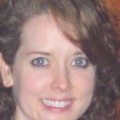

In [ ]:
from IPython.display import clear_output, Image, display 
display(Image("MeGlass_120x120/98074132@N00_identity_19@307298180_2.jpg"))  

In [ ]:
dataset_fld = '/content/'
img_fld = osp.join(dataset_fld, 'MeGlass_120x120')
# meta file with info about glasses
fname2glasses = {}
with open(osp.join(dataset_fld, 'meta.txt')) as f:
    for line in f.readlines():
        fname, has_glasses = line.split(' ')
        fname2glasses[fname] = int(has_glasses)
# create person index
dicts = []
for fname in os.listdir(img_fld):
    uid = fname.split('@')[0]
    dicts.append({
        'id': uid,
        'image_id': fname, 
        'filename': osp.join(img_fld, fname),
        'has_glasses': fname2glasses[fname],
        'dataset': 'meglass',
    })
meglass_df = pd.DataFrame(dicts)
meglass_df.head()

,id,image_id,filename,has_glasses,dataset
0,16448104,16448104@N02_identity_31@4262703084_0.jpg,/content/MeGlass_120x120/16448104@N02_identity...,0,meglass
1,23504336,23504336@N08_identity_3@2255316687_1.jpg,/content/MeGlass_120x120/23504336@N08_identity...,0,meglass
2,96626200,96626200@N07_identity_6@10591219525_1.jpg,/content/MeGlass_120x120/96626200@N07_identity...,0,meglass
3,21444820,21444820@N02_identity_3@8362505467_0.jpg,/content/MeGlass_120x120/21444820@N02_identity...,0,meglass
4,87652690,87652690@N00_identity_3@11674617004_0.jpg,/content/MeGlass_120x120/87652690@N00_identity...,0,meglass


#Functions

In [ ]:
import cv2
from tqdm.auto import tqdm
import dlib
import numpy as np
from PIL import ExifTags, Image
from PIL.ImageOps import exif_transpose

face_detector = dlib.get_frontal_face_detector()

def find_face(img):
    rectangles, scores, detector_num = face_detector.run(img, 0)
    if len(rectangles) == 0:
        # no faces were found
        # try with another sampling method
        rectangles, scores, detector_num = face_detector.run(img, 1)
        if len(rectangles) == 0:
            return None
    rect = rectangles[0]
    bbox = [
        max(0, rect.top()), 
        max(0, rect.bottom()), 
        max(0, rect.left()), 
        max(0, rect.right())
    ]
    return bbox


def crop_img(img):
    bbox = find_face(img)
    if bbox is None:
        return img
    top, bottom, left, right = bbox
    return img[top: bottom, left: right]


def resize_shortest_edge(img, width, height):
    dim = None
    (h, w) = img.shape[:2]

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(img, dim)
    return resized


def open_img(fp):
    pil_img = Image.open(fp)
    try:
        pil_img =  exif_transpose(pil_img)
    except:
        pass
    return np.array(pil_img)

In [ ]:
from multiprocessing import Pool, cpu_count
from functools import partial

def par_apply(data, func, func_params={}, n_jobs=4, length=None, verbose=0):
    if n_jobs == -1:
        n_jobs = cpu_count() // 2

    if not length:
        try:
            length = len(data)
        except:
            pass
    
    applied_data = []    
    if n_jobs == 1:
        print('Sequential processing.')
        if verbose:
            data = tqdm(data, total=length)
        for d in data:
            applied = func(d, **func_params)
            applied_data.append(applied)
    else:
        print('Parallel processing.')
        with Pool(processes=n_jobs) as pool:
            if verbose:
                data = tqdm(pool.imap(partial(func, **func_params), data), total=length)
            else:
                data = pool.imap(partial(func, **func_params), data)
            for applied in data:
                applied_data.append(applied)
    return applied_data

In [ ]:
def get_random_image(fld):
    fname = random.sample(os.listdir(fld), 1)[0]
    fp = osp.join(fld, fname)
    img = open_img(fp)
    return img

#merge dataset

In [ ]:
final_cols = ['dataset', 'image_id', 'has_glasses', 'filename']
df = pd.concat([celeba_df, meglass_df], ignore_index=True, sort=False)[final_cols]
df.groupby(['dataset', 'has_glasses']).size()

dataset  has_glasses
celeba   0              189406
         1               13193
meglass  0               33085
         1               14832
dtype: int64

In [ ]:
df.head()

,dataset,image_id,has_glasses,filename
0,celeba,000001.jpg,0,/content/img_align_celeba/img_align_celeba/000...
1,celeba,000002.jpg,0,/content/img_align_celeba/img_align_celeba/000...
2,celeba,000003.jpg,0,/content/img_align_celeba/img_align_celeba/000...
3,celeba,000004.jpg,0,/content/img_align_celeba/img_align_celeba/000...
4,celeba,000005.jpg,0,/content/img_align_celeba/img_align_celeba/000...


#Processing

,dataset,image_id,has_glasses,filename
110642,celeba,110643.jpg,0,/content/img_align_celeba/img_align_celeba/110...


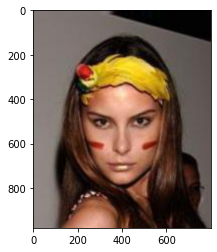

In [ ]:
sample_row = df[df.dataset == 'celeba'].sample(1)
fp = sample_row.filename.iloc[0]
img = open_img(fp)
img = resize_shortest_edge(img, 800, 600)
plt.imshow(img)
sample_row

In [ ]:
'/content/img_align_celeba/img_align_celeba/110643.jpg'

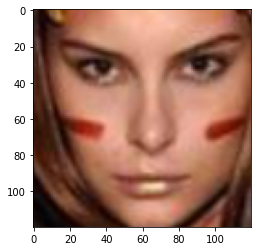

In [ ]:
crop = crop_img(img)
crop = cv2.resize(crop, (120, 120))
plt.imshow(crop)

In [ ]:
fld = 'data/crops/'
!mkdir -p $fld

def process(data):
    try:
        ind, row = data
        img = open_img(row.filename)
        if img.shape[0] > 600 or img.shape[1] > 600:
            img = resize_shortest_edge(img, 800, 600)
        crop = crop_img(img)
        crop = cv2.resize(crop, (120, 120))
        crop_fp = osp.join(fld, f'{ind:06}.jpg')
        plt.imsave(crop_fp, crop)
    except Exception as e:
        print(e) 

In [ ]:
par_apply(df.iterrows(), process, length=len(df), verbose=1, n_jobs=4)
crop_paths = [osp.join(fld, f'{i:06}.jpg') for i in df.index]
df['crop_path'] = crop_paths

Parallel processing.


  0%|          | 0/250516 [00:00<?, ?it/s]

In [ ]:
df.head()

,dataset,image_id,has_glasses,filename,crop_path
0,celeba,000001.jpg,0,/content/img_align_celeba/img_align_celeba/000...,data/crops/000000.jpg
1,celeba,000002.jpg,0,/content/img_align_celeba/img_align_celeba/000...,data/crops/000001.jpg
2,celeba,000003.jpg,0,/content/img_align_celeba/img_align_celeba/000...,data/crops/000002.jpg
3,celeba,000004.jpg,0,/content/img_align_celeba/img_align_celeba/000...,data/crops/000003.jpg
4,celeba,000005.jpg,0,/content/img_align_celeba/img_align_celeba/000...,data/crops/000004.jpg


In [ ]:
df.shape

(250516, 5)

#Split Data

In [ ]:
y = df['has_glasses'].values
X = df['crop_path'].values 

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [ ]:
train_df = pd.DataFrame(y_train, x_train)[0]
test_df  = pd.DataFrame(y_test, index=x_test)[0]

In [ ]:
test_df.head()

data/crops/242433.jpg    0
data/crops/049919.jpg    0
data/crops/059202.jpg    0
data/crops/103848.jpg    0
data/crops/077479.jpg    0
Name: 0, dtype: int64

#build Custom model
 `eyeglasses` & `no-eyeglasses`

In [ ]:
import torch
from torch import nn
import torchvision
from torch.utils.tensorboard import SummaryWriter
import sklearn
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms


class Classifier(nn.Module):
    def __init__(self, params):
        super(Classifier, self).__init__()
        self.num_classes = params['num_classes']
        self.classifier = nn.Linear(1000, self.num_classes)
        self.feature_extractor = torchvision.models.resnet18(pretrained=True)
        self.change_training_state_of_feature_extractor(False)

    def forward(self, x):
        features = self.feature_extractor(x)
        logits = self.classifier(features)
        return logits

    def change_training_state_of_feature_extractor(self, state):
        for param in self.feature_extractor.parameters():
            param.requires_grad = state

In [ ]:
class Eyeglasses_data(Dataset):
    def __init__(self, root, data_frame, transform=None):
        super(Eyeglasses_data, self).__init__()
        self.root = root
        self.data_frame = data_frame
        self.keys = data_frame.keys()
        self.transform = transform
    def __getitem__(self, idx):
        im_name = self.keys[idx]
        im_path = os.path.join(self.root, im_name)
        label = self.data_frame[im_name]
        image = plt.imread(im_path)
        if self.transform:
            image = self.transform(image)
        return image, label
    
    def __len__(self):
        return len(self.data_frame)

In [ ]:
train_transforms = transforms.Compose([
                                    transforms.ToPILImage(),
                                    transforms.Resize((200,200)),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ColorJitter(brightness=(0.5)),
                                    transforms.ToTensor()
])
test_transforms = transforms.Compose([
                                    transforms.ToPILImage(),
                                    transforms.Resize((200,200)),
                                    transforms.ToTensor()
])


train_dataset = Eyeglasses_data('/content/', train_df, transform=train_transforms)
trainloader = DataLoader(train_dataset, batch_size=256)

test_dataset = Eyeglasses_data('/content/', test_df, transform=test_transforms)
testloader = DataLoader(test_dataset, batch_size=256)

#Train

In [ ]:
class Trainer():    
    def __init__(self, model, trainloader, testloader, params):
        self.epoch = 0
        self.print_every = 10
        self.iter_counter = 0
        self.trainloader, self.testloader = trainloader, testloader
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = model.to(self.device)
        self.params = params
        self.exp_name = '___'.join(['']+[f'{k}={v}' for k,v in params.items()])
        print(f'executing:  {self.exp_name}')
        self.summarywriter = SummaryWriter(comment=self.exp_name)
        
        self.create_optimizer()
        weight = self.calculate_weight()
        weight = torch.tensor([0.9349, 0.0651])
        if self.params['loss_function'] == 'cross_entropy':
            weight = weight.to(self.device)
            self.criterion = nn.CrossEntropyLoss(weight=weight).to(self.device)
        else:
            raise Exception('unknown loss function!')
        
    def train(self):
        self.running_loss = 0.0
        for self.epoch in range(self.params['n_epochs']):
            if self.epoch == 0:
                self.model.change_training_state_of_feature_extractor(True)
            for inputs, labels in self.trainloader:
                self.iter_counter += 1
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                self.running_loss += loss.item()
                loss.backward()
                self.optimizer.step()
                if self.iter_counter % self.print_every == 0:
                    self.print_progress()
            self.test()
        
    def test(self):
        all_pred = torch.empty(0)
        all_labels = torch.empty(0)
        self.model.eval()
        for i, (inputs, labels) in enumerate(self.testloader):
            inputs, labels = inputs.to(trainer.device), labels.to(self.device)
            outputs = self.model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels = torch.cat((all_labels, labels.cpu()))
            all_pred = torch.cat((all_pred, predicted.cpu()))
        accuracy = 100 * (all_pred == all_labels).sum().item()/all_labels.size()[0]
        self.summarywriter.add_scalar('test accuracy', accuracy, self.epoch)
        print(f'accuracy= {accuracy}')
        conf_mat = sklearn.metrics.confusion_matrix(all_labels, all_pred)
        print('confusion matrix', conf_mat)
        self.save_model()
        self.model.train()
        
    def create_optimizer(self):
        if self.params['optimizer'] == 'SGD':
            self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.params['learning_rate'])
        elif self.params['optimizer'] == 'adam':
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.params['learning_rate'])
        else:
            raise Exception('Unknown optimizer!')

    def save_model(self):
        saving_dir = f'runs/{self.exp_name}/saved_models'
        os.makedirs(saving_dir, exist_ok=True)
        path = os.path.join(saving_dir, f'epoch_{self.epoch}_iter_{self.iter_counter}.pth')
        torch.save(self.model.state_dict(), path)
        
    def calculate_weight(self):
        weight = torch.zeros(self.params['num_classes'], dtype=torch.float32)
        for _, label in self.trainloader:
            weight += torch.nn.functional.one_hot(label, num_classes=self.params['num_classes']).sum(0)
        return weight/weight.sum()
    
    def print_progress(self):
        avg_loss = self.running_loss / self.print_every
        print(f'epoch = {self.epoch+1}    iter = {self.iter_counter}     loss = {avg_loss:.5f}')
        self.summarywriter.add_scalar('loss', avg_loss, (self.epoch+1)*self.iter_counter)
        self.running_loss = 0.0

In [ ]:
params = {
    'num_classes':2,
    'n_epochs':5,
    'batch_size':256,
    'optimizer':'adam',
    'learning_rate':0.0001,
    'loss_function':'cross_entropy'
}

In [ ]:
classifier = Classifier(params)
trainer    = Trainer(classifier, trainloader, testloader, params)

executing:  ___num_classes=2___n_epochs=5___batch_size=256___optimizer=adam___learning_rate=0.0001___loss_function=cross_entropy


In [ ]:
# run training ...

trainer.train()

epoch = 1    iter = 10     loss = 0.11075
epoch = 1    iter = 20     loss = 0.01121
epoch = 1    iter = 30     loss = 0.00903
epoch = 1    iter = 40     loss = 0.01055
epoch = 1    iter = 50     loss = 0.01041
epoch = 1    iter = 60     loss = 0.00535
epoch = 1    iter = 70     loss = 0.00525
epoch = 1    iter = 80     loss = 0.00710
epoch = 1    iter = 90     loss = 0.00622
epoch = 1    iter = 100     loss = 0.00581
epoch = 1    iter = 110     loss = 0.00388
epoch = 1    iter = 120     loss = 0.00609
epoch = 1    iter = 130     loss = 0.00613
epoch = 1    iter = 140     loss = 0.00421
epoch = 1    iter = 150     loss = 0.00448
epoch = 1    iter = 160     loss = 0.00427
epoch = 1    iter = 170     loss = 0.00618
epoch = 1    iter = 180     loss = 0.00291
epoch = 1    iter = 190     loss = 0.00977
epoch = 1    iter = 200     loss = 0.00621
epoch = 1    iter = 210     loss = 0.01110
epoch = 1    iter = 220     loss = 0.00802
epoch = 1    iter = 230     loss = 0.00731
epoch = 1    iter = 

In [ ]:
# run testing ...

trainer.test()

accuracy= 99.35600617382511
confusion matrix [[33349    27]
 [  215  3987]]


In [ ]:
torch.save(trainer.model, 'model_eyeglass.pt') 

#Test one image

In [ ]:
model00 = torch.load('model_eyeglass.pt')

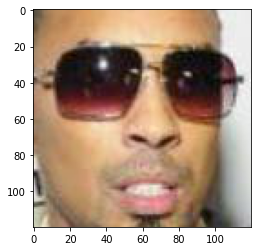

1


In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader,Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform_norm = transforms.Compose([
                                    transforms.ToPILImage(),
                                    transforms.Resize((200,200)),
                                    transforms.ToTensor()
])

def pred_glasses(image_path,model):
   #img = Image.open(image_path)
   img = plt.imread(image_path)
   imgplot = plt.imshow(img)
   plt.show()
   # get normalized image
   img_normalized = transform_norm(img).float()
   img_normalized = img_normalized.unsqueeze_(0)
   # input = Variable(image_tensor)
   img_normalized = img_normalized.to(device)
   # print(img_normalized.shape)
   with torch.no_grad():
      model.eval()  
      output =model(img_normalized)
     # print(output)
      index = output.data.cpu().numpy().argmax()
      #classes = trainloader.classes
      #class_name = classes[index]
      return index

im = os.listdir('/content/data/crops')[5300]
pred = pred_glasses('/content/data/crops/'+im, model00)
print(pred)